In [2]:
import torch
import torchvision.transforms.v2 as v2
from torchvision.tv_tensors import Image as Image_tv, Mask as Mask_tv
from PIL import Image

mask_img = Image.open("/home/treerspeaking/src/python/hand_seg/dataset/old_dataset/train/0_mask.jpg")
img = Image.open("/home/treerspeaking/src/python/hand_seg/dataset/old_dataset/train/0.jpg")

img, mask = img, Mask_tv(mask_img)

diff_trans = v2.Compose([
    v2.Resize((1024, 1024)), 
    v2.ToTensor()
])

train_transform = v2.Compose([
        # v2.Resize((input_size, input_size)),
        v2.RandomResizedCrop((512, 512), scale=(0.4, 1.0)),
        # v2.Resize((input_size, input_size)),
        v2.ToTensor(),
        v2.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.5, hue=[-0.5, 0.5]),
        # v2.ColorJitter(brightness=0.1, contrast=0.2, saturation=0.2, hue=0.2),
        # v2.RandomHorizontalFlip(p=0.5),
        # v2.RandomVerticalFlip(p=0.5),
        # v2.RandomRotation(90),
        # v2.RandomGrayscale(p=0.1),
        # v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
# Validation transforms (no augmentation)
val_transform = v2.Compose([
    v2.Resize((1024, 1024)),
    v2.ToTensor(),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Target transform for masks
target_transform = v2.Compose([
    v2.Resize((1024, 1024), interpolation=v2.InterpolationMode.NEAREST),
    v2.Lambda(lambda x: torch.from_numpy(np.array(x)).float() / 255.0),
    v2.Lambda(lambda x: (x > 0.5).float()),
    v2.Lambda(lambda x: x.unsqueeze(0))
])

# print((img - mask).sum())

img_t1, img_t2 = train_transform(img, img)
img_tens = diff_trans(img)

# print((img_t1 - img_t2).sum())
# print((img_t1 - img_t2).max())
# print((img_t1 - img_tens).sum())
# print((img_t1 - img_tens).max())

# mask_t1, mask_t2 = train_transform(mask, mask)
# print((mask_t1 - mask_t2).sum())
# print((mask_t1 - mask_t2).max())
# print((mask_t1 - mask).sum())
# print((mask_t1 - mask).max())




/home/treerspeaking/miniforge3/envs/hand_seg/lib/python3.11/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


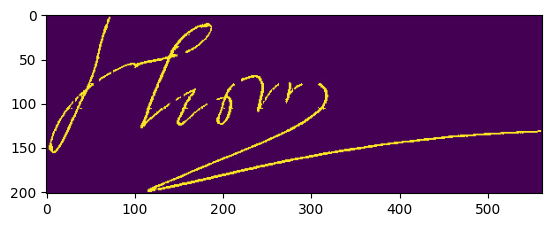

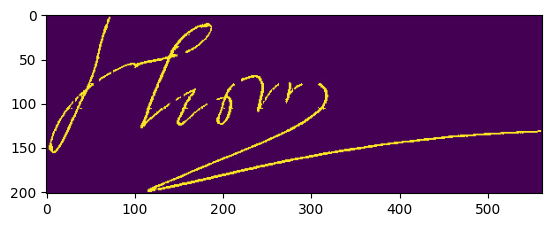

In [3]:
from matplotlib import pyplot as plt

mask_img = Image.open("/home/treerspeaking/src/python/hand_seg/dataset/old_dataset/train/0_mask.jpg")
img = Image.open("/home/treerspeaking/src/python/hand_seg/dataset/old_dataset/train/0_mask.jpg")

img, mask, mask_2 = img, Mask_tv(mask_img), Mask_tv(mask_img)
plt.figure()
plt.imshow(img)
plt.figure()
plt.imshow(mask.squeeze())

In [4]:
mask_img.size

(562, 202)

In [5]:

# mask_img = Image.open("/home/treerspeaking/src/python/hand_seg/dataset/old_dataset/train/0_mask.jpg")
# img = Image.open("/home/treerspeaking/src/python/hand_seg/dataset/old_dataset/train/0.jpg")

# img, mask = img, Mask_tv(mask_img)
# print(mask.shape)
# maskcon = torch.concat((mask, mask), dim=0)
# # print(maskcon.shape)

# img, huh, ha = train_transform(img, mask, maskcon[0])
# to_pil = v2.ToPILImage()
# print(huh.shape)
# print(ha.shape)
# mask, mask2 = torch.chunk(maskcon_cat, chunks=2, dim=0)

# plt.figure(figsize=(15, 5))

# plt.subplot(1, 3, 1)
# plt.imshow(to_pil(img))
# plt.title('Image')
# plt.axis('off')

# plt.subplot(1, 3, 2)
# plt.imshow(to_pil(mask.squeeze()))
# plt.title('Mask')
# plt.axis('off')

# plt.subplot(1, 3, 3)
# plt.imshow(to_pil(mask_2.squeeze()))
# plt.title('Mask 2')
# plt.axis('off')

# plt.tight_layout()
# plt.show()

torch.Size([1, 202, 562])
maskcon torch.Size([2, 202, 562])
mask after_trans torch.Size([2, 512, 512])
mask2 shape torch.Size([1, 512, 512])


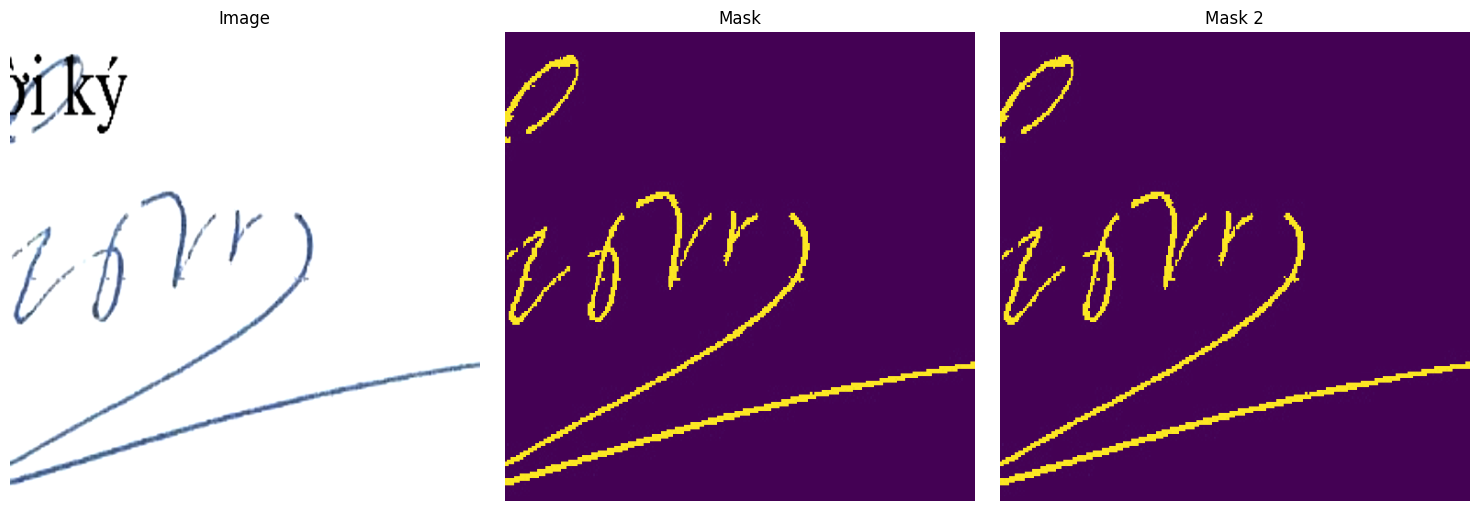

In [ ]:

mask_img = Image.open("/home/treerspeaking/src/python/hand_seg/dataset/old_dataset/train/0_mask.jpg")
mask_img = Image.open("/home/treerspeaking/src/python/hand_seg/dataset/old_dataset/train/0_mask.jpg")
img = Image.open("/home/treerspeaking/src/python/hand_seg/dataset/old_dataset/train/0.jpg")

img, mask = img, Mask_tv(mask_img)
print(mask.shape)
maskcon = torch.concat((mask, mask), dim=0)
maskcon = Mask_tv(maskcon)
print("maskcon",maskcon.shape)

img, mask = train_transform(img, maskcon)
to_pil = v2.ToPILImage()
print("mask after_trans", mask.shape)
mask, mask1 = torch.chunk(mask, chunks=2, dim=0)
print("mask2 shape", mask1.shape)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(to_pil(img))
plt.title('Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(to_pil(mask.squeeze()))
plt.title('Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(to_pil(mask1.squeeze()))
plt.title('Mask 2')
plt.axis('off')

plt.tight_layout()
plt.show()